# importing libraries

In [72]:
import re
import nltk
import math
import numpy as np

import matplotlib.pyplot as plt

from textblob import TextBlob
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from urllib.request import urlopen

import inflect
import pandas as pd

from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
from collections import Counter
nltk.download('brown')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\91741\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91741\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91741\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91741\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91741\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Preprocessing

In [73]:
# remove useless text from the data
def remove_useless_text(text):
    text = re.sub(r'\n_CHAPTER *[A-Z]*[A-Z]._|\nCHAPTER *[A-Z]*[A-Z].|\n_([\s\S]*?)_|\n([\s\S]*?)\*\*\* START OF THE PROJECT ([\s\S]*?)\*\*\*', ' ', text)
    text = re.sub(r'\n\*\*\* END OF THE PROJECT ([\s\S]*)',' ',text)
    return text



In [74]:
# reading text from the book and told
with open('pg66677.txt', 'r',encoding='utf-8') as f:
    text_book1 = ''.join(f.readlines())
    
with open('pg66678.txt', 'r',encoding='utf-8') as f:
    text_book2 = ''.join(f.readlines())

with open('pg66969.txt', 'r',encoding='utf-8') as f:
    text_book3 = ''.join(f.readlines())
    

In [75]:
text_book1 = remove_useless_text(text_book1)
text_book2= remove_useless_text(text_book2)
text_book3= remove_useless_text(text_book3)


In [76]:
# converting all text to lower case and removing any link
def to_lower(text):
    text = text.lower()
    re.sub(r"http\S+", "", text)
    return text

In [77]:
text_book1 = to_lower(text_book1)
text_book2=to_lower(text_book2)
text_book3=to_lower(text_book3)

In [78]:
#converting short forms to full forms
def conversion(text):
    
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [79]:
text_book1 = conversion(text_book1)
text_book2= conversion(text_book2)
text_book3= conversion(text_book3)

In [80]:
# removing all the puntuations from the text
def remove_punctuations(text):
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
    return text

In [81]:
text_book1= remove_punctuations(text_book1)
text_book2=remove_punctuations(text_book2)
text_book3=remove_punctuations(text_book3)


# Tokenization

In [82]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# splitting text into words
def tokonize_word(text):
    words = word_tokenize(text)
    return words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91741\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [83]:
words_book1 = tokonize_word(text_book1)
words_book2 = tokonize_word(text_book2)

FINDING NOUNS AND VERBS IN BOTH NOVELS AND THEIR RESPECTIVE WORDNET CATEGORIES

In [84]:
nltk.download('averaged_perceptron_tagger')

def noun(tokens):
  is_noun = lambda pos: pos[:1] == 'N'
  nouns = [word for (word, pos) in nltk.pos_tag(tokens) if is_noun(pos)] 
  return nouns
def verb(tokens):
  is_verb = lambda pos: pos[:1] == 'V'
  verbs = [word for (word, pos) in nltk.pos_tag(tokens) if is_verb(pos)] 
  return verbs

noun1=noun(words_book1)
noun2=noun(words_book2)
verb1=verb(words_book1)
verb2=verb(words_book2)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91741\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [85]:
print("Number of nouns in book 1 and book 2 respectively are "+ str(len(noun1))+" and "+ str(len(noun2)))
print("Number of verbs in book 1 and book 2 respectively are "+ str(len(verb1))+" and "+ str(len(verb2)))

Number of nouns in book 1 and book 2 respectively are 25967 and 23712
Number of verbs in book 1 and book 2 respectively are 20844 and 18850


In [86]:
#gives the categories of nouns or verb that the word belongs to
from nltk.corpus import wordnet as wn
def synset(words):
  categories=[]
  for word in words:
    cat=[]
    for synset in wn.synsets(word):
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        cat.append(synset.lexname())
      if('verb' in synset.lexname()):
        cat.append(synset.lexname())
    categories.append(cat)
  return categories

In [87]:
noun_syn1=synset(noun1)
noun_syn2=synset(noun2)
verb_syn1=synset(verb1)
verb_syn2=synset(verb2)

In [88]:
print(noun1[88])

road


In [89]:
print(noun_syn1[88][:])

['noun.artifact', 'noun.act']


In [90]:
#GIVES TOTAL NOUN LEXNAMES AND TOTAL VERB LEXNAMES FOR FREQUENCY DISTRIBUTIONS
def all_synsets(no,ve):
  nouns=[]
  verbs=[]
  for word in no:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        nouns.append(synset.lexname())
      if('verb' in synset.lexname()):
        verbs.append(synset.lexname())
  for word in ve:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        nouns.append(synset.lexname())
      if('verb' in synset.lexname()):
        verbs.append(synset.lexname())
      
  return nouns,verbs

In [91]:
noun_superset1,verb_superset1=all_synsets(noun1,verb1)
noun_superset2,verb_superset2=all_synsets(noun2,verb2)

In [92]:
# print(noun_superset1)

In [93]:
len(noun_superset1)

139182

Get the frequency of each category for each noun and verb in their corresponding hierarchies and plot a histogram for the same for each novels

([<matplotlib.axis.XTick at 0x2cf9c7179d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

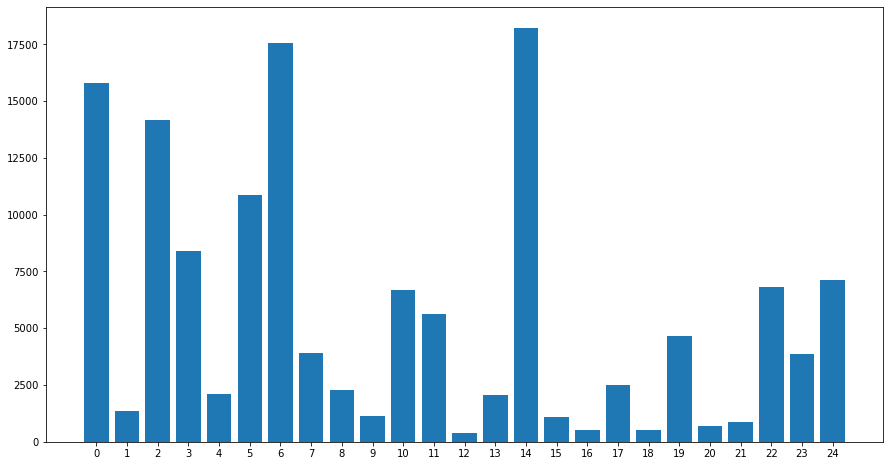

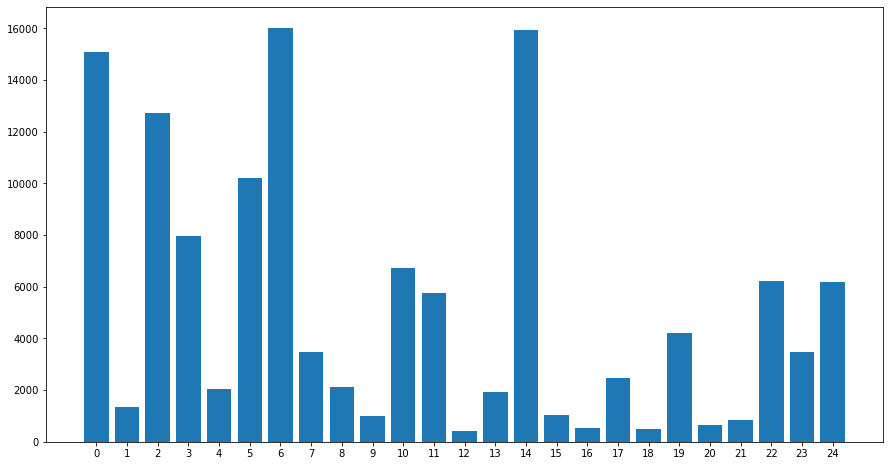

In [94]:
import numpy as np
labels, counts = np.unique(noun_superset1,return_counts=True)
import matplotlib.pyplot as plt 
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))
labels, counts = np.unique(noun_superset2,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [95]:
print(labels)

['noun.act' 'noun.animal' 'noun.artifact' 'noun.attribute' 'noun.body'
 'noun.cognition' 'noun.communication' 'noun.event' 'noun.feeling'
 'noun.food' 'noun.group' 'noun.location' 'noun.motive' 'noun.object'
 'noun.person' 'noun.phenomenon' 'noun.plant' 'noun.possession'
 'noun.process' 'noun.quantity' 'noun.relation' 'noun.shape' 'noun.state'
 'noun.substance' 'noun.time']


([<matplotlib.axis.XTick at 0x2cf9b91ae50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

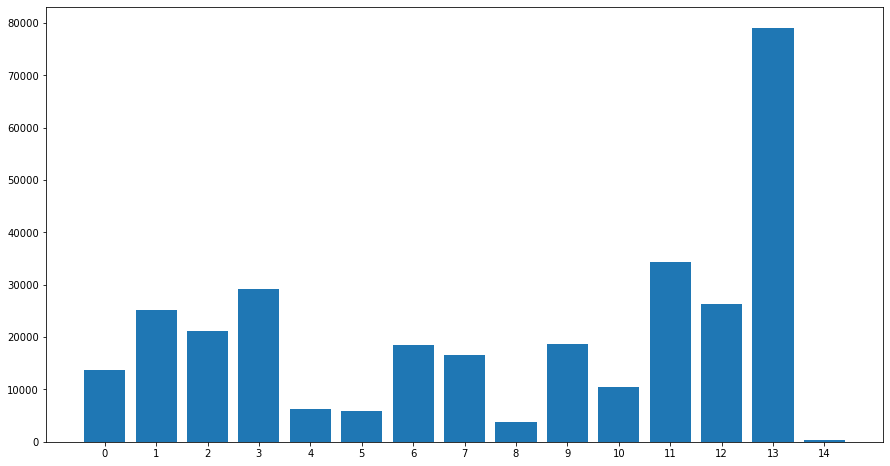

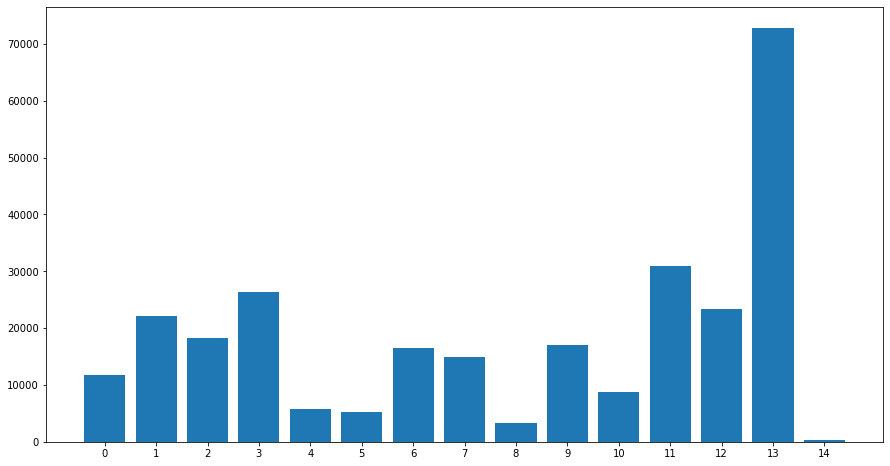

In [96]:
labels, counts = np.unique(verb_superset1,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))
labels, counts = np.unique(verb_superset2,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [97]:
print(labels)

['verb.body' 'verb.change' 'verb.cognition' 'verb.communication'
 'verb.competition' 'verb.consumption' 'verb.contact' 'verb.creation'
 'verb.emotion' 'verb.motion' 'verb.perception' 'verb.possession'
 'verb.social' 'verb.stative' 'verb.weather']


Recognise all Persons, Location, Organisation (Types given in Fig 22.1) in book. For this you have to do two steps: (1) First recognise all the entity and then (2) recognise all entity types. Use performance measures to measure the performance of the method used - For evaluation you take a considerable amount of random passages from the Novel, do a manual labelling and then compare your result with it. Present the accuracy with F1 score here.

In [98]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_lg

nlp = en_core_web_lg.load()
doc1 = nlp(text_book1)
doc2 = nlp(text_book2)
print("there are total "+str(len(doc1.ents))+" entities in book 1 and "+str(len(doc2.ents))+" in book 2")

there are total 2182 entities in book 1 and 1811 in book 2


In [99]:
print(doc1.similarity(doc2))

0.9998648230499536


In [100]:
print(doc2.similarity(doc1))

0.9998648230499536


In [101]:
print([(X, X.ent_iob_) for X in doc1])

[( , 'O'), (the, 'O'), (project, 'O'), (gutenberg, 'O'), (ebook, 'O'), (of, 'O'), (the, 'O'), (adventures, 'O'), (of, 'O'), (gil, 'B'), (blas, 'I'), (of, 'O'), (santillane, 'O'), (         , 'O'), (frontispiece, 'O'), ( , 'O'), (gil, 'O'), (blas, 'O'), (being, 'O'), (presented, 'O'), (to, 'O'), (royalty, 'O'), (      , 'O'), (alain, 'B'), (ren, 'I'), ( , 'O'), (le, 'O'), (sage, 'O'), (    , 'O'), (the, 'O'), (adventures, 'O'), (   , 'O'), (of, 'O'), (   , 'O'), (gil, 'O'), (blas, 'O'), (   , 'O'), (of, 'O'), (santillane, 'O'), (    , 'O'), (translated, 'O'), (from, 'O'), (the, 'O'), (french, 'B'), (by, 'O'), (tobias, 'B'), (smollett, 'I'), (    , 'O'), (preceded, 'O'), (by, 'O'), (    , 'O'), (a, 'O'), (biographical, 'O'), (and, 'O'), (critical, 'O'), (notice, 'O'), (of, 'O'), (le, 'B'), (sage, 'O'), (    , 'O'), (by, 'O'), (george, 'B'), (saintsbury, 'I'), (    , 'I'), (with, 'O'), (twelve, 'B'), (original, 'O'), (etchings, 'O'), (by, 'O'), (r, 'O'), ( , 'O'), (de, 'O'), (los, 'O'), (

In [102]:
print([(X, X.ent_iob_) for X in doc2])

[( , 'O'), (the, 'O'), (project, 'O'), (gutenberg, 'O'), (ebook, 'O'), (of, 'O'), (the, 'O'), (adventures, 'O'), (of, 'O'), (gil, 'B'), (blas, 'I'), (of, 'O'), (santillane, 'O'), (          , 'O'), (alain, 'B'), (ren, 'I'), ( , 'O'), (le, 'O'), (sage, 'O'), (    , 'O'), (the, 'O'), (adventures, 'O'), (   , 'O'), (of, 'O'), (   , 'O'), (gil, 'O'), (blas, 'O'), (   , 'O'), (of, 'O'), (santillane, 'O'), (    , 'O'), (translated, 'O'), (from, 'O'), (the, 'O'), (french, 'B'), (by, 'O'), (tobias, 'B'), (smollett, 'I'), (    , 'O'), (preceded, 'O'), (by, 'O'), (    , 'O'), (a, 'O'), (biographical, 'O'), (and, 'O'), (critical, 'O'), (notice, 'O'), (of, 'O'), (le, 'B'), (sage, 'O'), (    , 'O'), (by, 'O'), (george, 'B'), (saintsbury, 'I'), (    , 'I'), (with, 'O'), (twelve, 'B'), (original, 'O'), (etchings, 'O'), (by, 'O'), (r, 'O'), ( , 'O'), (de, 'O'), (los, 'O'), (rios, 'O'), (     , 'O'), (in, 'O'), (three, 'B'), (volumes, 'O'), ( , 'O'), (vol, 'O'), ( , 'O'), (ii, 'O'), (       , 'O'), (lo

In [103]:
def entity_recognition(text):
  doc=nlp(text)
  person=[]
  org=[]
  location=[]
  for X in doc:  
    if (X.ent_type_=='PERSON') and X.text not in person:
      person.append(X.text)
    if (X.ent_type_=='ORG')and X.text not in org:
      org.append(X.text)
    if ((X.ent_type_=='LOC') or (X.ent_type_=='GPE')) and X.text not in location:
      location.append(X.text)
  return person,org,location

In [104]:
person1,org1,location1=entity_recognition(text_book1)
person2,org2,location2=entity_recognition(text_book2)
print("number of person entities in book 1 and book 2 respectively are "+str(len(person1))+" and "+str(len(person2)))
print("number of organization entities in book 1 and book 2 respectively are "+str(len(org1))+" and "+str(len(org2)))
print("number of location entities in book 1 and book 2 respectively are "+str(len(location1))+" and "+str(len(location2)))

number of person entities in book 1 and book 2 respectively are 251 and 180
number of organization entities in book 1 and book 2 respectively are 110 and 79
number of location entities in book 1 and book 2 respectively are 42 and 51


In [105]:
print(org1)

['le', 'york', 'castille', 'madrid', 'valladolid', '    ', 'aurora', 'de', 'guzman', 'salamanca', 'lincoln', 'boiteux', 'the', 'royal', 'court', 'of', 'small', 'district', 'st', ' ', 'gildas', 'rhuys', 'colle', 'piron', 'boulogne', 'bibloth', 'que', 'des', 'romans', '  ', 'bachelier', 'salamangue', 'italienne', 'pierrot', 'scaramouche', 'evremond', 'longueur', 'granada', 'malheur', 'n', 'avoir', 'pas', 'notre', 'contra', 'malherbe', 'boileau', 'school', 'inexorabilis', 'acer', 'ennemis', 'mortels', 'dryden', 'seville', 'burgos', 'senate', 'commonwealth', 'rolando', 'gallop', 'mansilla', 'treasury', 'guardia', 'zamora', 'corregidor', 'undeceived', 'camilla', 'cicero', 'arias', 'londona', 'house', 'silla', 'lancet', 'cuchillo', 'pooh', 'candlestick', 'justice', 'smallpox', 'duke', 'medina', 'ang', 's', 'bacchus', 'hunt', 'stabili', 'laurel', 'philip', 'thence', 'tagus', 'centell', 'criss', 'cross', 'coxcombical', 'clarin', 'segiar', 'uncommon', 'pan', 'don', 'pedro', 'penar', 'chamber', 

In [106]:
def freq(str_list): 
    unique_words = set(str_list)
    counts = {}
    for words in unique_words : 
        counts[words] = str_list.count(words)
    return counts

In [107]:
X = freq(person1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

[('zenette', 1), ('zavaleta', 1), ('zapata', 1), ('zamora', 1), ('younker', 1), ('y', 1), ('william', 1), ('wieland', 1), ('whither', 1), ('weight', 1), ('we', 1), ('virgil', 1), ('vire', 1), ('vincent', 1), ('ventoleria', 1), ('velez', 1), ('velasco', 1), ('vanille', 1), ('valent', 1), ('turcaret', 1), ('troy', 1), ('triaquero', 1), ('tre', 1), ('touchwood', 1), ('tom', 1), ('tobias', 1), ('thomas', 1), ('tancos', 1), ('swain', 1), ('styx', 1), ('street', 1), ('standish', 1), ('solis', 1), ('sol', 1), ('smollett', 1), ('simon', 1), ('silva', 1), ('signora', 1), ('signor', 1), ('siffredi', 1), ('senor', 1), ('segiar', 1), ('scud', 1), ('scott', 1), ('sangrado', 1), ('sandoval', 1), ('sally', 1), ('salamanca', 1), ('sais', 1), ('saintsbury', 1), ('saint', 1), ('sa', 1), ('s', 1), ('ry', 1), ('rolando', 1), ('rojas', 1), ('roger', 1), ('rodriguez', 1), ('rodrigo', 1), ('roderic', 1), ('robinson', 1), ('ricardo', 1), ('ren', 1), ('rascal', 1), ('raphael', 1), ('ramirez', 1), ('qu', 1), ('

In [108]:
X = freq(location1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))

[('vincent', 1), ('valladolid', 1), ('toledo', 1), ('the', 1), ('spain', 1), ('sicily', 1), ('seville', 1), ('sea', 1), ('salamanca', 1), ('portugal', 1), ('pomatum', 1), ('paris', 1), ('palermo', 1), ('oviedo', 1), ('of', 1), ('morocco', 1), ('mendoza', 1), ('madrid', 1), ('lybia', 1), ('london', 1), ('le', 1), ('kennel', 1), ('jupiter', 1), ('gil', 1), ('galicia', 1), ('france', 1), ('europe', 1), ('egypt', 1), ('don', 1), ('diego', 1), ('coast', 1), ('centell', 1), ('castille', 1), ('burgos', 1), ('bohemia', 1), ('blas', 1), ('biscay', 1), ('avellaneda', 1), ('arabia', 1), ('antonio', 1), ('africa', 1), ('       ', 1)]


In [ ]:
#Performance Measures

#book1
B1_text1=' Do not you recollect Fabricio,your townsman and schoolfellow?'
B1_text2='I would give all the wine in Valladolid for a pint of water.'

#book2
B2_text1='I gave a left-handed blessing to Euphrasia, and wept over the weakness of Don Gonzales, to be so foolishly infatuated by her.  '
B2_text2='We were interrupted by the arrival of a courier, charged with a letter for Seraphina from the Count de Polan. '

hand_label_1_1=['O','O''O','O','PER','O','O','O','O']
hand_label_1_2=['O','O''O','O','O','O','O','LOC','O','O','O','O','O']
hand_label_2_1=['O','O''O','O','O','O','PER','O','O','O','O','O','O','PER','O','O','O','O','O','O','O']
hand_label_2_2=['O','O''O','O','O','O','O','O','O','O','O','O','O','O','PER','O','O','PER']

#labels generated 

labelB1T1=([(word.text) for word in nlp(B1_text1).ents])
labelB1T2=([(word.text) for word in nlp(B1_text2).ents])

labelB1T1=([(word.text) for word in nlp(B1_text1).ents])
labelB1T2=([(word.text) for word in nlp(B1_text2).ents])

from typing import List, Dict ,Sequence

class Matrics:
  def__init__(self,sents_true_labels: Sequence[Sequence[Dict]], sents_pred_labels:Sequence[Sequence[Dict]]):

Use B1, B2 and B3 for the following: Third Part:
1. Create TF-IDF vectors for all books and find the cosine similarity between each of them and find which two books are more similar.
2. Do lemmatization of the books and recreate the TF-IDF vectors for all the books and find the cosine similarity of each pair of books.

# cosine

## before lemmatization

In [109]:
data = [text_book1,text_book2]

In [110]:
import pandas as pd

def create_dataframe(matrix, tokens):

    doc_names = [f'text_book{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,100,14,1668,1686,1692,1694,1695,1707,1708,1715,...,zealous,zeangir,zebreros,zendono,zenette,zenora,zephora,zest,zuniga,zunigna
text_book1,0.000000,0.000094,0.000132,0.000132,0.000132,0.000132,0.000132,0.000132,0.000132,0.000265,...,0.000094,0.000000,0.000000,0.000000,0.000927,0.000000,0.000000,0.000188,0.000000,0.000000
text_book2,0.000144,0.000102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000205,0.000575,0.000144,0.000719,0.000000,0.000144,0.000144,0.000205,0.000144,0.000144


In [112]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['text_book1','text_book2'])

,text_book1,text_book2
text_book1,1.00000,0.99582
text_book2,0.99582,1.00000


In [113]:
data = [text_book1,text_book3]

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,117,14,1668,1686,1692,1694,1695,1707,1708,1715,...,youthful,youthfulness,zaire,zamora,zapata,zavaleta,zeal,zealous,zenette,zest
text_book1,0.000000,0.000132,0.000132,0.000132,0.000132,0.000132,0.000132,0.000132,0.000132,0.000264,...,0.000094,0.000132,0.000132,0.000397,0.000397,0.000132,0.00119,0.000132,0.000926,0.000264
text_book2,0.000473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000112,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [115]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['text_book1','text_book3'])

,text_book1,text_book3
text_book1,1.00000,0.96669
text_book2,0.96669,1.00000


In [116]:
data = [text_book2,text_book3]

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,100,117,14,17th,1881,1921,1922,24,26th,a1,...,zeal,zealous,zeangir,zebreros,zendono,zenora,zephora,zest,zuniga,zunigna
text_book1,0.000144,0.000000,0.000144,0.000000,0.000144,0.000000,0.000000,0.000144,0.000000,0.000000,...,0.002156,0.000288,0.000575,0.000144,0.000719,0.000144,0.000144,0.000288,0.000144,0.000144
text_book2,0.000000,0.000473,0.000000,0.000158,0.000000,0.000158,0.000158,0.000000,0.000158,0.000158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [118]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['text_book2','text_book3'])

,text_book2,text_book3
text_book1,1.000000,0.963358
text_book2,0.963358,1.000000


# after lemmatization

In [119]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
def nltk2wn_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:                    
    return None
def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
  wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
  res_words = []
  for word, tag in wn_tagged:
    if tag is None:                        
      res_words.append(word)
    else:
      res_words.append(lemmatizer.lemmatize(word, tag))
  return " ".join(res_words)

In [120]:
text_book1 = lemmatize_sentence(text_book1)

In [121]:
text_book2 = lemmatize_sentence(text_book2)

In [124]:
text_book3 = lemmatize_sentence(text_book3)

In [122]:
data = [text_book1,text_book2]

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)


,100,14,1668,1686,1692,1694,1695,1707,1708,1715,...,zealous,zeangir,zebreros,zendono,zenette,zenora,zephora,zest,zuniga,zunigna
text_book1,0.000000,0.000087,0.000122,0.000122,0.000122,0.000122,0.000122,0.000122,0.000122,0.000244,...,0.000087,0.00000,0.000000,0.000000,0.000853,0.000000,0.000000,0.000174,0.000000,0.000000
text_book2,0.000132,0.000094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000189,0.00053,0.000132,0.000662,0.000000,0.000132,0.000132,0.000189,0.000132,0.000132


In [123]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['doc_1','doc_2'])

,doc_1,doc_2
text_book1,1.000000,0.996824
text_book2,0.996824,1.000000


In [125]:
data = [text_book1,text_book3]

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,117,14,1668,1686,1692,1694,1695,1707,1708,1715,...,youthful,youthfulness,zaire,zamora,zapata,zavaleta,zeal,zealous,zenette,zest
text_book1,0.000000,0.000122,0.000122,0.000122,0.000122,0.000122,0.000122,0.000122,0.000122,0.000244,...,0.000087,0.000122,0.000122,0.000365,0.000365,0.000122,0.001096,0.000122,0.000853,0.000244
text_book2,0.000425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [126]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['text_book1','text_book3'])

,text_book1,text_book3
text_book1,1.000000,0.971275
text_book2,0.971275,1.000000


In [127]:
data = [text_book2,text_book3]

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,100,117,14,17th,1881,1921,1922,24,26th,a1,...,zeal,zealous,zeangir,zebreros,zendono,zenora,zephora,zest,zuniga,zunigna
text_book1,0.000132,0.000000,0.000132,0.000000,0.000132,0.000000,0.000000,0.000132,0.000000,0.000000,...,0.001986,0.000265,0.00053,0.000132,0.000662,0.000132,0.000132,0.000265,0.000132,0.000132
text_book2,0.000000,0.000425,0.000000,0.000142,0.000000,0.000142,0.000142,0.000000,0.000142,0.000142,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [128]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['text_book2','text_book3'])

,text_book2,text_book3
text_book1,1.000000,0.968446
text_book2,0.968446,1.000000
